In [46]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load csv
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset (mt = mouse trial)
mt_df = pd.merge(mouse_df, trial_df, on = "Mouse ID")

# Display the data table for preview
mt_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [55]:
# Group the data by drug and timepoint
mt_grped = mt_df.groupby(["Drug", "Timepoint"])

# Get the mean and SEM of tumour volume
tumour_means = pd.DataFrame(mt_grped["Tumor Volume (mm3)"].mean()) # mean for each Drug-Timepoint combination
tumour_sem = pd.DataFrame(mt_grped["Tumor Volume (mm3)"].sem()) # SEM for each Drug-Timepoint combination

In [215]:
# Summarise tumour size by timepoint
tumour_overall = tumour_means.unstack(level = 0) # Drug as column header
tumour_overall = tumour_overall[["Tumor Volume (mm3)"][0]]

tumour_overall.mean() # Mean per drug (across times); population mean
tumour_overall.std()  # SD per drug (across times); population mean 

# Determine the time points and the drugs
timepoints = tumour_overall.index
drugs = tumour_overall.keys()

no_drugs = len(drugs)
no_timepoints = len(timepoints)

# summarise data into a table
summary_tumor = pd.DataFrame({"Mean": tumour_overall.mean(),
                              "Std Dev": tumour_overall.std()})
summary_tumor

,Mean,Std Dev
Drug,,
Capomulin,40.485084,3.070266
Ceftamin,53.752434,6.475575
Infubinol,54.963549,6.975888
Ketapril,56.806906,8.448745
Naftisol,55.891024,8.274705
Placebo,56.012209,7.839506
Propriva,54.911934,7.020389
Ramicane,39.986931,3.260406
Stelasyn,55.981636,7.871403


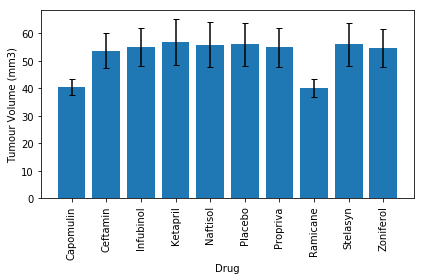

In [240]:
# Overall, were there differences in effect of the drugs to tumour size?
fig, ax = plt.subplots()
plt.bar(drugs,summary_tumor["Mean"], yerr = summary_tumor["Std Dev"], capsize = 3)
plt.xlabel("Drug")
plt.ylabel("Tumour Volume (mm3)")
plt.xticks(rotation = "vertical")
plt.tight_layout()

In [ ]:
# Was there improvement across time for the drugs tested?
tumour_columns = list(tumour_over_time.keys())


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Get the mean of metastasis sites and convert to dataframe
metastatic_series = mt_grped2["Metastatic Sites"].mean()
metastatic_df = metastatic_series.to_frame().reset_index()

# Preview DataFrame
metastatic_df.head()

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()